# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Carlos Esteban Aristizábal**   
cearistizabala@unal.edu.co  
M.Sc Gestión Energética Industrial (cand.). ITM
Ingebiero Químico. UNAL
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [65]:
import pandas as pd

x=[]
    
for n in range(1995,2018):
    if n < 2000:
        skip = 3
    else:
        skip = 2
    nomar = ('Precio_Bolsa_Nacional_($kwh)_' + str(n)  ) #
    if n>2016:
        nomar += '.xls'
    else:
        nomar += '.xlsx'
    
    y=pd.read_excel('Precio_Bolsa_Nacional_($kwh)_' + str(n) + '.xlsx', skiprows=skip, 
                    parse_cols=24)#parse dice el número de columnas a tomar
    x.append(y)
    z=pd.concat(x)
    print(z.head())
    print(z.tail())

        Fecha      0      1      2      3      4      5      6      7      8  \
0  1995-07-20    NaN  1.073  1.073  1.073  1.073  1.073  1.073  1.073  1.074   
1  1995-07-21  1.073  1.000  1.000  1.000  1.000  1.000  5.000  6.000  6.000   
2  1995-07-22  1.073  1.073  1.000  1.000  1.000  1.073  1.303  1.303  1.303   
3  1995-07-23  1.073  1.000  1.000  1.000  1.000  1.000  0.100  1.000  1.000   
4  1995-07-24  1.000  1.000  0.990  1.000  1.000  1.073  3.000  3.000  3.000   

   ...       14     15     16     17      18      19      20     21     22  \
0  ...    1.073  1.073  1.073  1.073   1.074   1.897   1.897  1.897  1.073   
1  ...    5.000  1.000  1.000  5.000  12.000  16.670  11.929  5.000  1.000   
2  ...    1.073  1.000  1.000  1.000   1.303   2.500   2.500  1.303  1.073   
3  ...    1.000  0.100  0.100  1.000   1.238   1.238   1.238  1.238  1.073   
4  ...    1.073  1.073  3.000  2.000  18.630  22.500   9.256  3.000  1.073   

      23  
0  1.073  
1  1.000  
2  1.073  
3  1.0

**2.--** Compute e imprima el número de registros con datos faltantes.

In [66]:
NAN=z.isnull().values.ravel().sum()
print(NAN)

247


**3.--** Compute e imprima el número de registros duplicados.

In [67]:
Dup=z[z.duplicated()]
print(len(Dup))

67


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [68]:
DatossinNAN=z.dropna()
print(DatossinNAN)

         Fecha           0           1           2           3           4  \
1   1995-07-21    1.073000    1.000000    1.000000    1.000000    1.000000   
2   1995-07-22    1.073000    1.073000    1.000000    1.000000    1.000000   
3   1995-07-23    1.073000    1.000000    1.000000    1.000000    1.000000   
4   1995-07-24    1.000000    1.000000    0.990000    1.000000    1.000000   
5   1995-07-25    0.990000    0.990000    0.989000    0.990000    0.990000   
6   1995-07-26    0.500000    0.500000    0.500000    0.500000    0.500000   
7   1995-07-27    0.500000    0.500000    0.500000    0.500000    0.500000   
8   1995-07-28    0.000000    0.000000    0.000000    0.000000    0.000000   
9   1995-07-29    1.000000    1.000000    0.000000    0.000000    1.000000   
10  1995-07-30    1.072000    1.000000    0.000000    0.000000    0.000000   
11  1995-07-31    0.000000    0.000000    0.000000    0.000000    0.000000   
12  1995-08-01    0.000000    0.000000    0.000000    0.000000  

In [69]:
DatosF=DatossinNAN.drop_duplicates()
print(DatosF)

         Fecha           0           1           2           3           4  \
1   1995-07-21    1.073000    1.000000    1.000000    1.000000    1.000000   
2   1995-07-22    1.073000    1.073000    1.000000    1.000000    1.000000   
3   1995-07-23    1.073000    1.000000    1.000000    1.000000    1.000000   
4   1995-07-24    1.000000    1.000000    0.990000    1.000000    1.000000   
5   1995-07-25    0.990000    0.990000    0.989000    0.990000    0.990000   
6   1995-07-26    0.500000    0.500000    0.500000    0.500000    0.500000   
7   1995-07-27    0.500000    0.500000    0.500000    0.500000    0.500000   
8   1995-07-28    0.000000    0.000000    0.000000    0.000000    0.000000   
9   1995-07-29    1.000000    1.000000    0.000000    0.000000    1.000000   
10  1995-07-30    1.072000    1.000000    0.000000    0.000000    0.000000   
11  1995-07-31    0.000000    0.000000    0.000000    0.000000    0.000000   
12  1995-08-01    0.000000    0.000000    0.000000    0.000000  

In [70]:
v=[]

for n in range (len(DatosF['Fecha'])):
    v.append(str(DatosF.iloc[n,0])[0:7])
DatosF['key']=v
DatosF

/Users/carlosestebanaristizabal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Fecha,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,key
1,1995-07-21,1.073000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000,6.000000,...,1.000000,1.000000,5.000000,12.000000,16.670000,11.929000,5.000000,1.000000,1.000000,1995-07
2,1995-07-22,1.073000,1.073000,1.000000,1.000000,1.000000,1.073000,1.303000,1.303000,1.303000,...,1.000000,1.000000,1.000000,1.303000,2.500000,2.500000,1.303000,1.073000,1.073000,1995-07
3,1995-07-23,1.073000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,...,0.100000,0.100000,1.000000,1.238000,1.238000,1.238000,1.238000,1.073000,1.000000,1995-07
4,1995-07-24,1.000000,1.000000,0.990000,1.000000,1.000000,1.073000,3.000000,3.000000,3.000000,...,1.073000,3.000000,2.000000,18.630000,22.500000,9.256000,3.000000,1.073000,1.000000,1995-07
5,1995-07-25,0.990000,0.990000,0.989000,0.990000,0.990000,1.073000,1.263000,1.263000,1.263000,...,1.073000,1.073000,1.073000,1.263000,1.500000,1.263000,1.263000,1.073000,0.990000,1995-07
6,1995-07-26,0.500000,0.500000,0.500000,0.500000,0.500000,0.990000,1.073000,1.073000,1.073000,...,0.500000,0.990000,0.990000,1.073000,8.000000,1.073000,0.990000,0.500000,0.000000,1995-07
7,1995-07-27,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,1.073000,1.500000,0.990000,0.500000,0.500000,0.500000,1995-07
8,1995-07-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.463000,0.463000,1.000000,0.463000,...,0.463000,0.463000,0.463000,1.073000,1.073000,1.073000,1.000000,0.000000,0.000000,1995-07
9,1995-07-29,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.070000,1.070000,1.070000,...,1.070000,1.070000,1.070000,1.070000,1.070000,1.072000,1.070000,1.070000,1.070000,1995-07
10,1995-07-30,1.072000,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,1.072000,...,0.000000,0.000000,0.100000,1.072000,1.073000,1.073000,1.072000,1.072000,0.000000,1995-07


**5.--** Compute y grafique el precio promedio diario.

In [111]:
MeanDia=DatosF.groupby('Fecha').mean()
MeanDia=MeanDia.mean(axis=1)
MeanDia.head()


1996-02-01    13.38704
1996-02-02    13.05664
1996-02-03    14.02396
1996-02-04     7.00024
1996-02-05     8.04020
dtype: float64

In [112]:
#import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

len(MeanDia)

7875

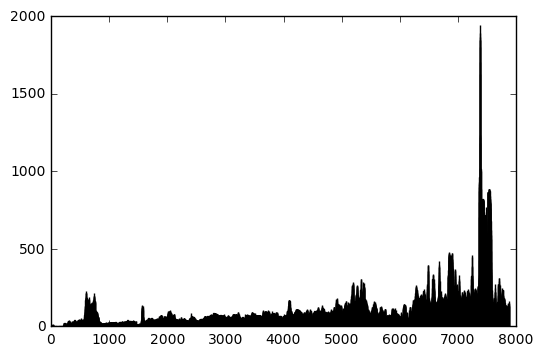

In [76]:
plt.bar(range(len(MeanDia)), MeanDia)
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

In [79]:
MaxMes=DatosF.groupby('key').max()
MaxMes=MaxMes.max(axis=1)
MaxMes.head()

key
1995-07     22.500
1995-08     40.000
1995-09     40.572
1995-10     33.700
1995-11    111.907
dtype: float64

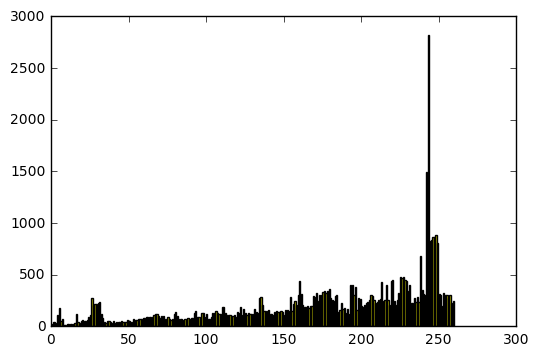

In [113]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.bar(range(len(MaxMes)), MaxMes, color='y')
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.

In [114]:
MinMes=DatosF.groupby('key').min()
MinMes=MinMes.min(axis=1)
MinMes.head()

key
1995-07    0.0
1995-08    0.0
1995-09    1.0
1995-10    0.0
1995-11    1.0
dtype: float64

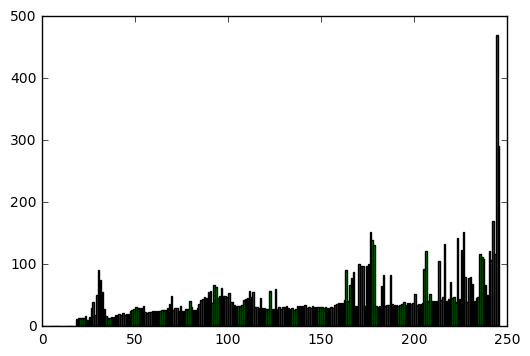

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.bar(range(len(MinMes)), MinMes, color='g')
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [115]:
PromMes=DatosF.groupby('key').mean()
PromMes=PromMes.mean(axis=1)
PromMes.head()

key
1995-07     1.551822
1995-08     6.858488
1995-09    10.574920
1995-10    10.085689
1995-11    26.489391
dtype: float64

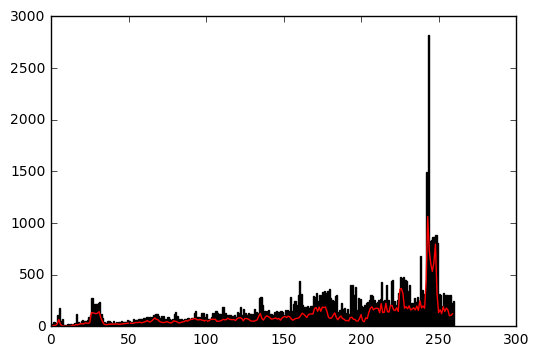

In [104]:
#import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.plot(range(len(PromMes)), PromMes, color='r')
plt.ion()
plt.bar(range(len(MaxMes)), MaxMes, color='k')
plt.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [130]:
MaxDia=DatosF.groupby('Fecha').max()
MaxDia=MaxDia.max(axis=1)

In [127]:
del DatosF['SSSS']

e=[1, 2, 3, 1, 1, 1, 1]*int(len(DatosF)/7)
DatosF['Dia semana']=e

r=[]

for n in range (len(DatosF['Fecha'])):
    r.append(max(DatosF.iloc[n,1:24]))
DatosF['PMaxD']=r
DatosF.head()

/Users/carlosestebanaristizabal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Fecha,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,key,Dia semana,PMaxD
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,5.000,12.000,16.670,11.929,5.000,1.000,1.000,1995-07,1,16.670
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1995-07,2,2.500
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,1.000,1.238,1.238,1.238,1.238,1.073,1.000,1995-07,3,1.238
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,2.000,18.630,22.500,9.256,3.000,1.073,1.000,1995-07,1,22.500
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1995-07,1,1.500


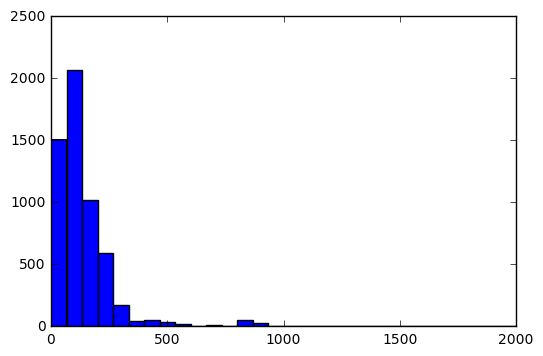

In [134]:
Ddia= DatosF[DatosF['Dia semana']==1]
plt.hist(Ddia['PMaxD'], bins=30, range=(0,2000), stacked=True, color = ['b'])
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

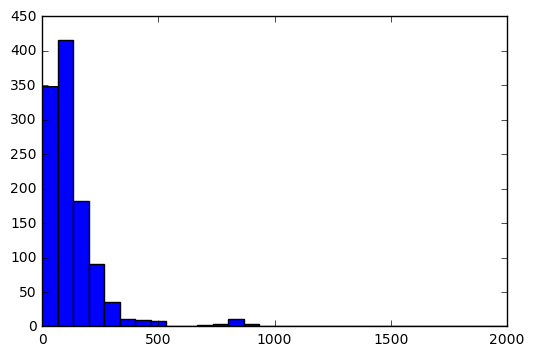

In [135]:
#DatosF.where(DatosF > 0)

Dsab= DatosF[DatosF['Dia semana']==2]
plt.hist(Dsab['PMaxD'], bins=30, range=(0,2000), stacked=True, color = ['b'])
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

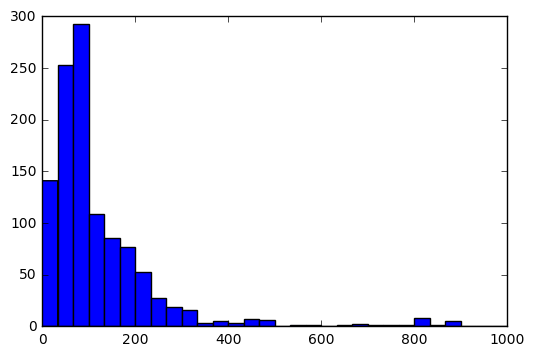

In [136]:
Dsab= DatosF[DatosF['Dia semana']==3]
plt.hist(Dsab['PMaxD'], bins=30, range=(0,1000), stacked=True, color = ['b'])
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [63]:
year=[]

for n in range (len(DatosF['Fecha'])):
    year.append(str(DatosF.iloc[n,0])[0:4])
DatosF['Año']=year

/Users/carlosestebanaristizabal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [64]:
MinYear=DatosF.groupby('Año').min()
MinYear=MinYear.min(axis=1)
MinYear

Año
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
dtype: float64

In [44]:
import plotly.plotly as py
import plotly.figure_factory as FF

int(MinYear.loc[1,1])

TypeError: cannot do label indexing on <class 'pandas.indexes.base.Index'> with these indexers [1] of <class 'int'>

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

ValueError: could not convert string to float: '1995-07'

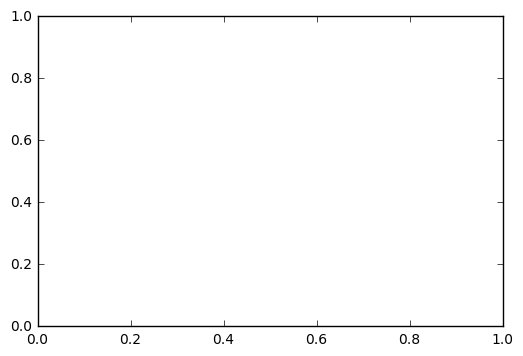

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#plt.plot(v, PromMes, color='r')
#plt.ion()
plt.bar(v, MeanDia, color='k')
plt.show()


---